# Testing on new data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("D:/IIT Delhi/With_Temperature/N5 Degree/Drive_cycle_test.csv")

In [3]:
df.columns

Index(['Time', 'Current', 'Volatge', 'Capacity', 'Enegry', 'Power'], dtype='object')

In [4]:
df.head(20)

,Time,Current,Volatge,Capacity,Enegry,Power
0,1,0.0,4.1046,0.000,0.000,0.00000
1,2,0.0,4.1043,0.000,0.000,0.00000
2,3,0.0,4.1043,0.000,0.000,0.00000
3,4,0.0,4.1040,0.000,0.000,0.00000
4,5,0.0,4.1043,0.000,0.000,0.00000
5,6,0.0,4.1040,0.000,0.000,0.00000
6,7,0.0,4.1043,0.000,0.000,0.00000
7,8,0.0,4.1043,0.000,0.000,0.00000
8,9,0.0,4.1043,0.000,0.000,0.00000
9,10,0.0,4.1046,0.000,0.000,0.00000


## Checking the values of Current

Text(0.5, 1.0, 'Dataset')

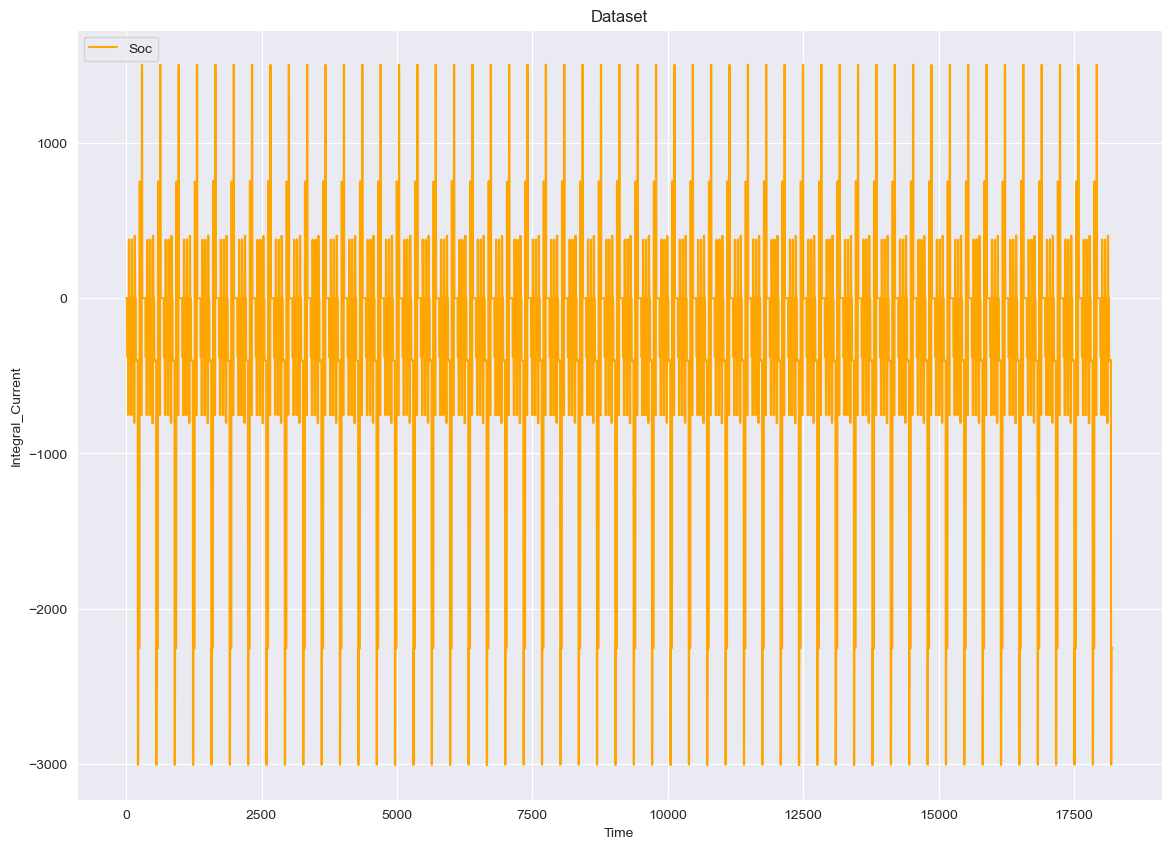

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Current'],color='orange')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [6]:
# Removing These 3 columns, not in right format
powe = df.pop('Power')
en = df.pop('Enegry')
capc = df.pop('Capacity')

In [7]:
df.head()

,Time,Current,Volatge
0,1,0.0,4.1046
1,2,0.0,4.1043
2,3,0.0,4.1043
3,4,0.0,4.1040
4,5,0.0,4.1043


## Capacity Calculation

In [8]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*1000)

df.loc[:, "Capacity"] = integral

In [9]:
df["Capacity"].min()

-2.06302883333339

In [10]:
df['Current']=df['Current']/1000

In [11]:
df.head(30)

,Time,Current,Volatge,Capacity
0,1,0.0000,4.1046,0.000000
1,2,0.0000,4.1043,0.000000
2,3,0.0000,4.1043,0.000000
3,4,0.0000,4.1040,0.000000
4,5,0.0000,4.1043,0.000000
5,6,0.0000,4.1040,0.000000
6,7,0.0000,4.1043,0.000000
7,8,0.0000,4.1043,0.000000
8,9,0.0000,4.1043,0.000000
9,10,0.0000,4.1046,0.000000


# Calculating Nominal SOC

CPU times: total: 172 ms
Wall time: 175 ms


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

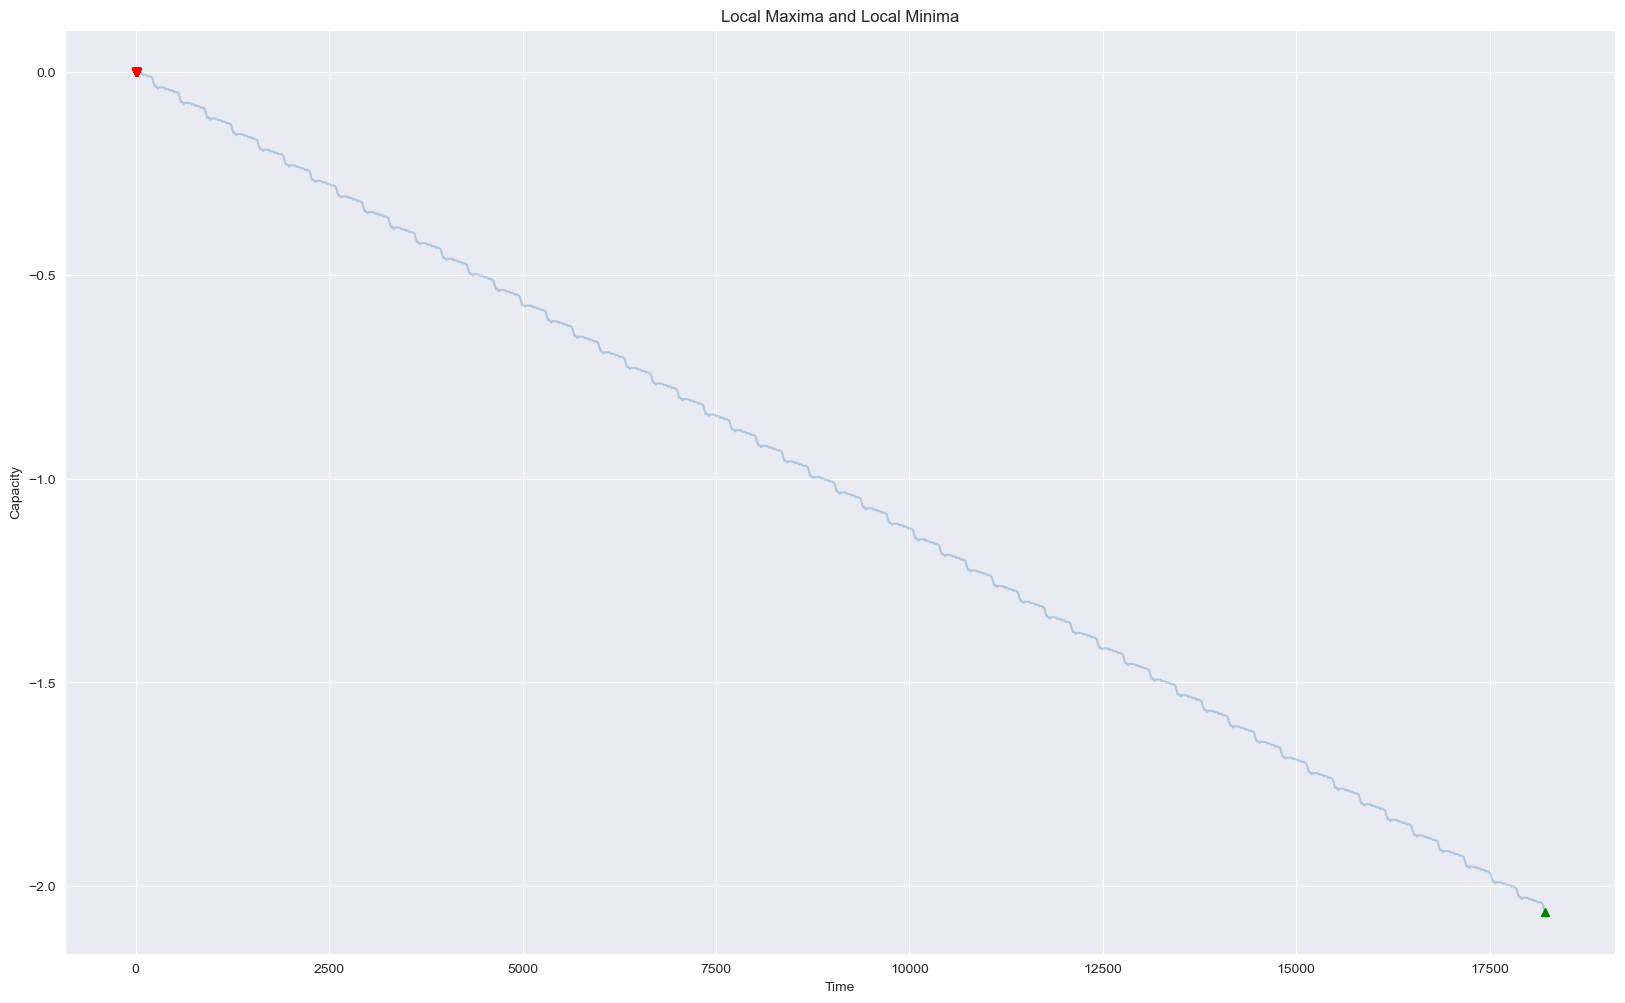

In [12]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=200)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=200)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [13]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [16]:
# print(maximum_point)
print(minimum_point.min())
# print(minimum_point)

-2.06302883333339


In [17]:
df.insert(loc=4,column='SOC',value = df['Capacity']/-2.06)

In [ ]:
# from scipy.integrate import cumulative_trapezoid

# p = df["Time"][:df.shape[0]]
# q = df["Current"][:df.shape[0]]

# integral = (cumulative_trapezoid(q,p,initial=0))/(3600*45.848)

# df.loc[:, "Integral_current"] = integral

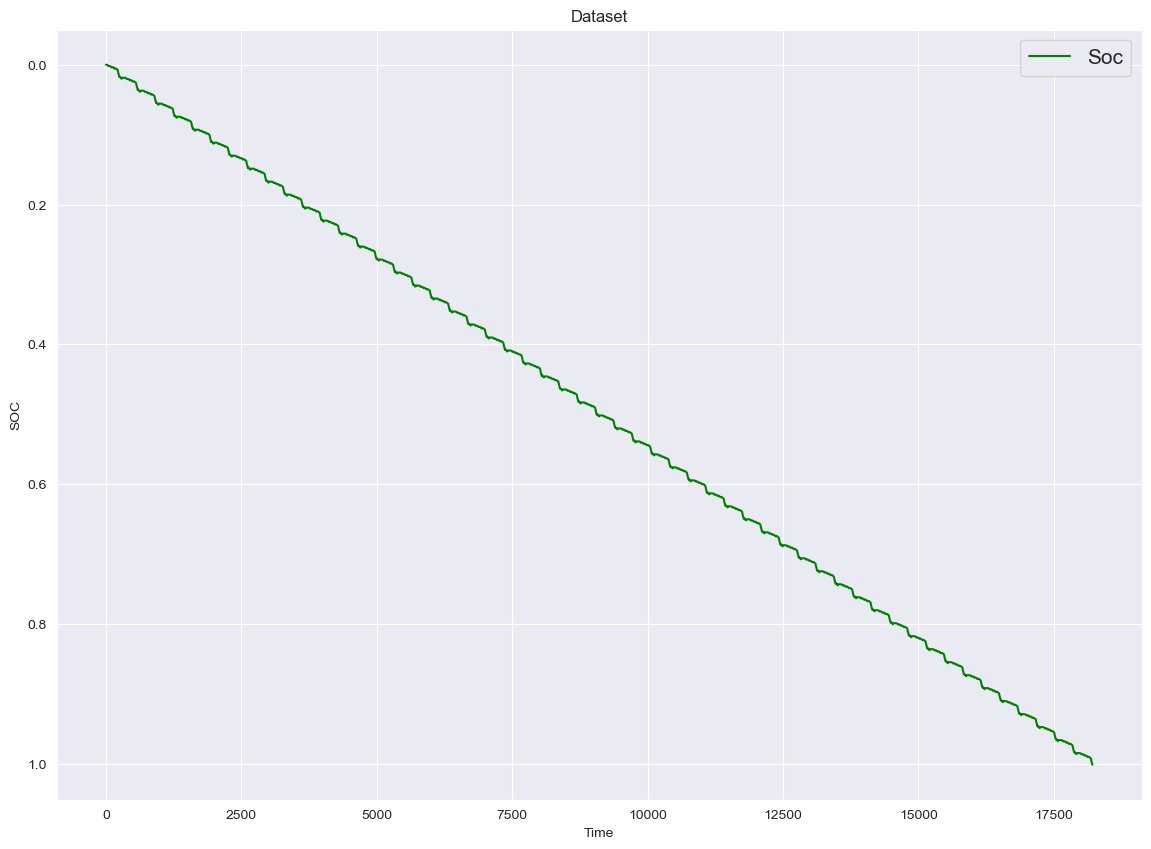

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='green')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('SOC')
plt.xlabel('Time')
plt.legend(["Soc"], loc ="upper right",fontsize=15)
plt.title('Dataset')
plt.gca().invert_yaxis()   # Inverting the image

In [ ]:
# timest = df.pop('Time')

In [27]:
df.rename(columns={'Volatge': 'Voltage'},inplace=True)

In [28]:
new_cols = ['Time', 'Voltage', 'Current','Capacity','SOC']
df=df[new_cols]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18212 entries, 0 to 18211
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      18212 non-null  int64  
 1   Voltage   18212 non-null  float64
 2   Current   18212 non-null  float64
 3   Capacity  18212 non-null  float64
 4   SOC       18212 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 711.5 KB


In [30]:
df.head()

,Time,Voltage,Current,Capacity,SOC
0,1,4.1046,0.0,0.0,-0.0
1,2,4.1043,0.0,0.0,-0.0
2,3,4.1043,0.0,0.0,-0.0
3,4,4.1040,0.0,0.0,-0.0
4,5,4.1043,0.0,0.0,-0.0


In [ ]:
# df.insert(loc=4, column='Charge', value = df['Capacity']*3600)  # Adding the column

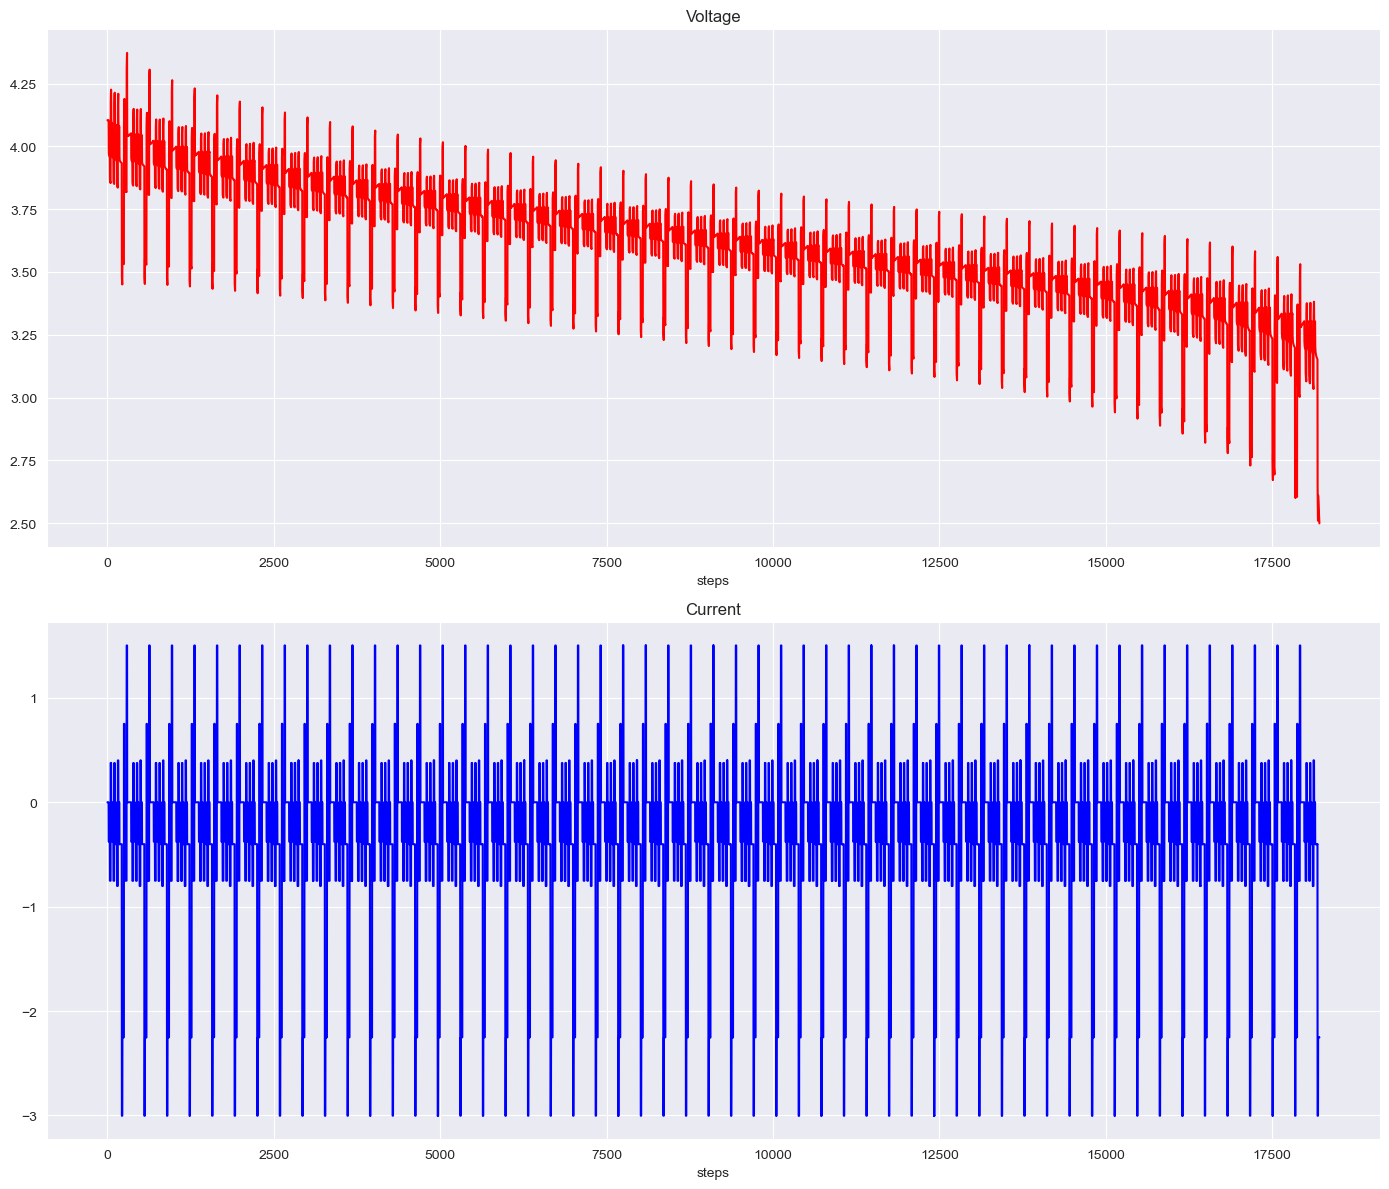

In [32]:
plt.figure(figsize =(14,12))
plt.subplot(2,1,1)
plt.plot(df["Voltage"],'r')
plt.xlabel('steps')
plt.title("Voltage")
plt.subplot(2,1,2)
plt.plot(df["Current"],'b')
plt.xlabel('steps')
plt.title("Current")
plt.tight_layout()
plt.show()

# Normalizing and Spliting

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Voltage','Current','Capacity'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [34]:
Y = df.pop('SOC')
X = df

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# Model Testing and saving

## Model 1

In [39]:
model_1 = tf.keras.models.load_model('D:\IIT Delhi\Dataset_B2_dec\Saved_models\model_6_SOCesti.h5')

# Show the model architecture
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_1.evaluate(X,Y)

570/570 [==============================] - 1s 2ms/step - loss: 0.9260 - rmse: 1.1184 - mae: 0.9260 - mse: 1.2508 - mape: 990370.3750


[0.926040768623352,
 1.1183973550796509,
 0.926040768623352,
 1.2508126497268677,
 990370.375]

## Model_2

In [41]:
model_2 = tf.keras.models.load_model('D:\IIT Delhi\Dataset_B2_dec\Saved_models\model_12_SOCesti.h5')

# Show the model architecture
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 3, 32)             96        
                                                                 
 conv1d_9 (Conv1D)           (None, 2, 8)              520       
                                                                 
 flatten_4 (Flatten)         (None, 16)                0         
                                                                 
 dense_30 (Dense)            (None, 5)                 85        
                                                                 
 dense_31 (Dense)            (None, 1)                 6         
                                                                 
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_2.evaluate(X,Y)

570/570 [==============================] - 1s 773us/step - loss: 0.9257 - rmse: 1.1182 - mae: 0.9257 - mse: 1.2503 - mape: 988802.5625


[0.9257490634918213,
 1.1181751489639282,
 0.9257490634918213,
 1.2503156661987305,
 988802.5625]

In [43]:
prediction_2 = model_2.predict(X_test)

114/114 [==============================] - 0s 680us/step


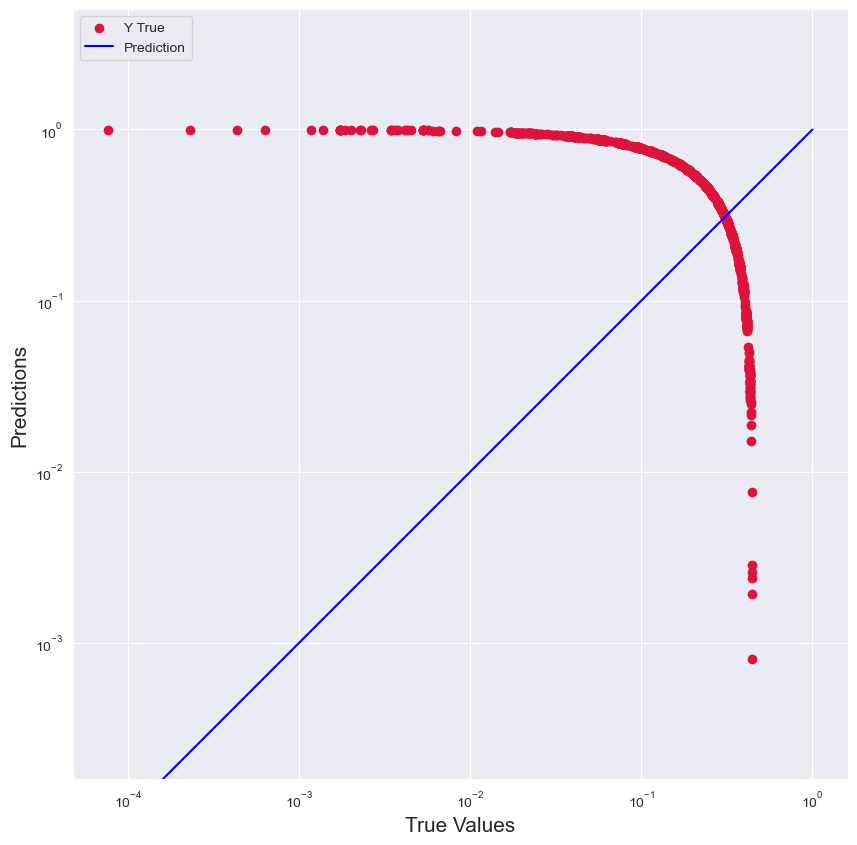

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_2), max(Y_test))
p2 = min(min(prediction_2), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()